# Project 2

## Table of Content
1. Introduction
2. Gathering Data
3. Assessing Data
4. Cleaning Data
5. Analysis
6. Conclusion

## Introduction
**This is the data wrangling process of the WeRatedog twitter archive data to produce meaningful insights**

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

In [2]:
import tweepy

## Gathering Data

First data (df) was gotten from the downloaded csv file of the WeRateDog Twitter archive

In [3]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The second dataset (image_predictions_df) is from a URL link provided using request.get library

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
myfile = url.split('/')[-1]
# response
request = requests.get(url)
# print(r.status_code)
# writing the content to a file
# first: Check if the file is already exist
if not os.path.isfile(myfile):
    with open(myfile, 'wb') as file:
        file.write(request.content)

In [6]:
# let us load the image predicted to dataframe
# load the file to dataframe
image_predictions_df = pd.read_csv(myfile, sep='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Third dataset (df3) is from the Twitter API. Couldn't access it directly from the database. Hence I got it using the tweet-json.txt file provided.

### Code from the twitter_api.py
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
df_list = []
count = 0
file_name = 'tweet-json.txt'
with open(file_name, encoding='utf-8') as file:
    for file_line in file:
        count +=1
        json_file = file.readline()
        data = (json.loads(file_line))
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                                 'retweet_count':retweet_count,
                                 'favorite_count':favorite_count})
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

In [8]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226
...,...,...,...
1172,666058600524156928,61,115
1173,666055525042405380,261,448
1174,666050758794694657,60,136
1175,666044226329800704,147,311


## Asessing Data visually and programmatically

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [12]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [13]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
df[df.name.apply(len) < 2]['name']

56      a
649     a
775     O
801     a
1002    a
1004    a
1017    a
1049    a
1193    a
1207    a
1340    a
1351    a
1361    a
1368    a
1382    a
1499    a
1737    a
1785    a
1853    a
1854    a
1877    a
1878    a
1923    a
1941    a
1955    a
1994    a
2034    a
2066    a
2116    a
2125    a
2128    a
2146    a
2153    a
2161    a
2191    a
2198    a
2211    a
2218    a
2222    a
2235    a
2249    a
2255    a
2264    a
2273    a
2287    a
2304    a
2311    a
2314    a
2327    a
2334    a
2347    a
2348    a
2350    a
2352    a
2353    a
2354    a
Name: name, dtype: object

In [15]:
df[df.name.apply(len) < 3]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [19]:
df3.duplicated().any()

False

### Tidiness Issues

    1. Retweet count table should be merged with twitter archive table
    2. Image_prediction table should be merged with twitter archive table
    3. The different classification of the dogs(doggo,floofer,pupper,puppo) should be in one column
    4. The rating numerator and denominator should merged into one column as (rating/denominator)
    

### Quality Issues

    1. Rating numerator should be 10 and above
    2. All rating denominator should be 10
    3. Dog's name with length less than 2 should be removed
    4. Dog's names "an","by",should be removed
    5. False p1_dog should be removed because it is usually not a dog
    6. Change none values in name and dog_class columns to NaN
    7. Only original ratings are required (no retweets)
    8. Remove the tweets with replies(only original tweets required)
    9. Remove columns with rows not useful i.e. in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id
       retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,img_num.
    10. Change the names of unclear columns (p1, p1_conf, p1_dog etc) 


### Creating copies

In [20]:
df_arch_clean = df.copy()

In [21]:
df_imag_clean = image_predictions_df.copy()

In [22]:
df_api_clean = df3.copy()

## Step 3 - Cleanning Data

### Tidiness Issue_1
Retweet count table should be merged with twitter archive table

### Define


Merging retweet count table (df_api_clean) with the twitter archive table(df_arch_clean)

### Code

In [23]:
df_arch_clean = df_arch_clean.merge(df_api_clean, on = 'tweet_id')

### Test

In [24]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']

### Tidiness Issue_2
Image_prediction table should be merged with twitter archive table
### Define
Merging the image predictor table (df_imag_clean) with the twitter archive table

### Code

In [25]:
df_arch_clean = df_arch_clean.merge(df_imag_clean, on = 'tweet_id')

### Test

In [26]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Tidiness Issue_3
The different classification of the dogs(doggo,floofer,pupper,puppo) should be in one column

### Define
*Merging the different columns of the dogs(doggo,floofer,pupper,puppo) into one column named "dog_class"

### Code

In [27]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [column for column in list(df_arch_clean.columns) if column not in melt_columns]

# Melt the columns
df_arch_clean = pd.melt(df_arch_clean, id_vars=stay_columns,
                                var_name='class', value_name='dog_class')

# Drop the class column
df_arch_clean.drop(axis=1, columns=['class'], inplace=True)

# Remove the duplicated rows, that stem from the Melting step
df_arch_clean= df_arch_clean[~df_arch_clean.duplicated()]


In [28]:
# Remove duplicated tweet id for None values after melting
duplicates = df_arch_clean[(df_arch_clean.tweet_id.duplicated(keep=False)) & (df_arch_clean.dog_class == 'None')]
df_arch_clean.drop(duplicates.index, inplace=True)

# Remove duplicate tweet id
df_arch_clean = df_arch_clean[~df_arch_clean.tweet_id.duplicated()]

### Test

In [29]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_class']

### Quality_Issue_1
Rating numerator should be 10 and above

### Define
Removing rating_numerators less than 10

### Code

In [30]:
df_arch_clean= df_arch_clean[df_arch_clean.rating_numerator >= 10 ]

### Test

In [31]:
df_arch_clean.rating_numerator.value_counts()

12     246
10     216
11     195
13     138
14      19
99       1
420      1
26       1
143      1
45       1
80       1
204      1
50       1
165      1
75       1
84       1
15       1
27       1
Name: rating_numerator, dtype: int64

### Quality_Issue_2
All rating denominator should be 10

### Define
Removing rating_denomenators greater or less than 10 to make denominator equal only 10

### Code

In [32]:
#removing all denominators greater or less than 10
df_arch_clean= df_arch_clean[df_arch_clean.rating_denominator == 10 ]

### Test

In [33]:
# checking to make sure all denominators are 10
df_arch_clean.rating_denominator.value_counts()

10    819
Name: rating_denominator, dtype: int64

### Tidiness_Issue_4
The rating numerator and denominator should merged into one column as (rating/denominator)

### Define
Merging the rating numerator and the rating denominator into one column named "ratings" 

### Code

In [34]:
#merging the numerator and denominator ratings
df_arch_clean['ratings'] = df_arch_clean['rating_numerator'].astype(str) + "/" + df_arch_clean['rating_denominator'].astype(str)

### Test

In [35]:
df_arch_clean.ratings.value_counts()

12/10     246
10/10     216
11/10     195
13/10     138
14/10      19
15/10       1
75/10       1
26/10       1
420/10      1
27/10       1
Name: ratings, dtype: int64

### Quality_Issue_3
Dog's name with length less than 2 should be removed

### Define
Removing dog's name with length less than 2

### Code

In [36]:
df_arch_clean= df_arch_clean[df_arch_clean.name.apply(len) >= 2 ]

### Test

In [37]:
df_arch_clean[df_arch_clean.name.apply(len) <  2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,ratings


In [38]:
df_arch_clean[df_arch_clean.name.apply(len) < 3]['name']

159    Mo
182    Bo
226    Bo
276    Bo
307    an
333    Al
348    my
359    Bo
407    Bo
580    an
740    by
861    Ed
968    an
Name: name, dtype: object

### Quality_Issue_4
Dog's names "an","by",should be removed

### Define
Removing dog's name that are "an" and "by" 

### Code

In [39]:
#removing invalid dog name i.e an, by
df_arch_clean = df_arch_clean[df_arch_clean ["name"].str.contains("an|by") == False]

### Test

In [40]:
df_arch_clean[df_arch_clean.name.apply(len) < 3]['name']

159    Mo
182    Bo
226    Bo
276    Bo
333    Al
348    my
359    Bo
407    Bo
861    Ed
Name: name, dtype: object

### Quality_Issue_5
False p1_dog should be removed because it is usually not a dog

### Define
Removing the false entry for p1_dog 

### Code

In [41]:
# removing all the false statement in p1_dog
df_arch_clean= df_arch_clean[df_arch_clean.p1_dog == True ]

### Test

In [42]:
df_arch_clean.p1_dog.value_counts()

True    603
Name: p1_dog, dtype: int64

### Quality_Issue_6
Change none values in name and dog_class columns to NaN

### Define
Changing the None values in name and dog_class column to a NaN

### Code

In [43]:
# changing the none values to nan for both name and dog_class column
name_index = df_arch_clean[df_arch_clean.name == 'None'].index
df_arch_clean.loc[name_index, 'name'] = np.nan

dog_index = df_arch_clean[df_arch_clean.dog_class == 'None'].index
df_arch_clean.loc[dog_index, 'dog_class'] = np.nan

### Test

In [44]:
len(df_arch_clean[df_arch_clean.name == 'None'])

0

In [45]:
len(df_arch_clean[df_arch_clean.dog_class == 'None'])

0

### Quality_Issue_7
Only original ratings are required (no retweets)

### Define
Take only original ratings(no retweets)

### Code

In [46]:
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_id.isnull()]

### Test

In [47]:
len(df_arch_clean[~df_arch_clean.retweeted_status_id.isnull()])

0

### Quality_Issue_8
Remove the tweets with replies(only original tweets required)

### Define
Take only tweets without replies

### Code

In [48]:
df_arch_clean = df_arch_clean[df_arch_clean.in_reply_to_status_id.isnull()]

### Test

In [49]:
len(df_arch_clean[~df_arch_clean.in_reply_to_status_id.isnull()])

0

### Quality_Issue_9
Remove columns with rows not useful i.e. in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id
       retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,img_num.
       
### Define
Dropping invalid columnn (in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp', img_num)

### Code

In [50]:
#removing the column that are not important for analysis
removed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp','img_num' ]
df_arch_clean.drop(columns=removed, axis=1, inplace=True)

## Test

In [51]:
list(df_arch_clean.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_class',
 'ratings']

### Quality_Issue_10
Change the names of unclear columns (p1, p1_conf, p1_dog etc) 

### Define
Changing unclear column names (p1,p2,p3, p1_conf,p2_conf,p3_conf, p1_dog,p2_dog,p3_dog) 

## Code

In [52]:
df_arch_clean.rename(columns={'p1':'1st_predict', 'p1_conf':'predict_confidence', 'p1_dog':'predict_confirm',
                             'p2':'2nd_predict','p2_conf':'predict_confidence2', 'p2_dog': 'predict_confirm2',
                             'p3': '3rd_predict', 'p3_conf': 'predict_confidence3', 'p3_dog':'predict_confirm3'}, inplace=True) 

## Test

In [53]:
list(df_arch_clean.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 '1st_predict',
 'predict_confidence',
 'predict_confirm',
 '2nd_predict',
 'predict_confidence2',
 'predict_confirm2',
 '3rd_predict',
 'predict_confidence3',
 'predict_confirm3',
 'dog_class',
 'ratings']

In [54]:
df_arch_clean.shape

(570, 21)

In [55]:
df_arch_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [56]:
df= pd.read_csv('twitter_archive_master.csv')

In [57]:
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,predict_confidence,predict_confirm,2nd_predict,predict_confidence2,predict_confirm2,3rd_predict,predict_confidence3,predict_confirm3,dog_class,ratings
0,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
1,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN,13/10
2,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN,13/10
3,890006608113172480,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,7624,31166,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,NaN,13/10
4,888917238123831296,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,4709,29611,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,NaN,12/10


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

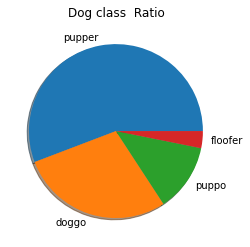

In [59]:
plt.pie(df.dog_class.value_counts(), labels=['pupper', 'doggo', 'puppo', 'floofer'], shadow=True)
plt.title('Dog class  Ratio');

    -The pie chart shows that most of the dogs rated are classified in the pupper stage followed by doggo

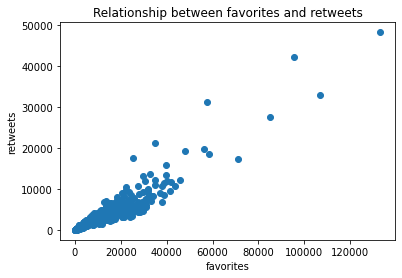

In [60]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Relationship between favorites and retweets')
plt.xlabel('favorites')
plt.ylabel('retweets');

    -This scatter plot shows that there is a positive correlation between the favorite count and the retweet count

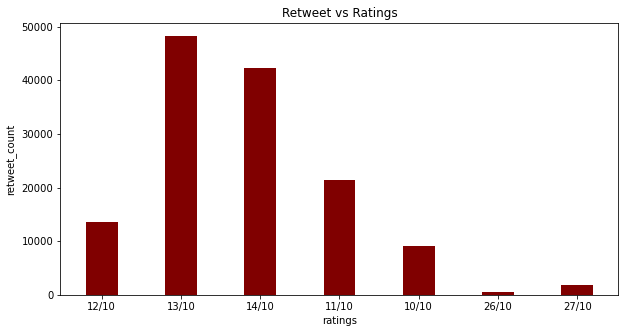

In [61]:
# creating the dataset
ratings_count = df['ratings']
count_retweet = df['retweet_count']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ratings_count, count_retweet, color ='maroon', width = 0.4)

plt.xlabel("ratings")
plt.ylabel("retweet_count")
plt.title("Retweet vs Ratings")
plt.show()


    -From the graph above, it can be seen that there is more retweets for the dogs rated 13/10

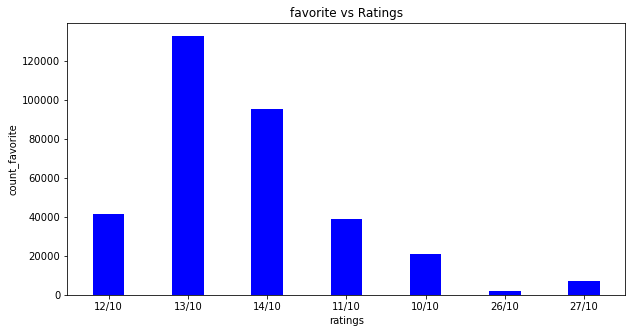

In [62]:
# creating the dataset
ratings_count = df['ratings']
count_favorite = df['favorite_count']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ratings_count, count_favorite, color ='blue', width = 0.4)

plt.xlabel("ratings")
plt.ylabel("count_favorite")
plt.title("favorite vs Ratings")
plt.show()

    - Just like with the retweets, the dogs rated 13/10 were the most favorite

### Conclusion
From the data wrangling process, we can conclude that there is a strong correlation between the retweet_count and the favorite count. Furthermore, most of the dogs were in the pupper stage and the most popular and loved rating is 13/10.
